In [ ]:
# Oladele Sekinah (Ajibike)

In [ ]:
# A project to predict the optimum number of clusters and represent it visually using a given Iris dataset.

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Loading the Iris dataset

iris = load_iris()
iris_df = pd.DataFrame()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Finding the optimum number of clusters for K Means? How to determine the value of K?

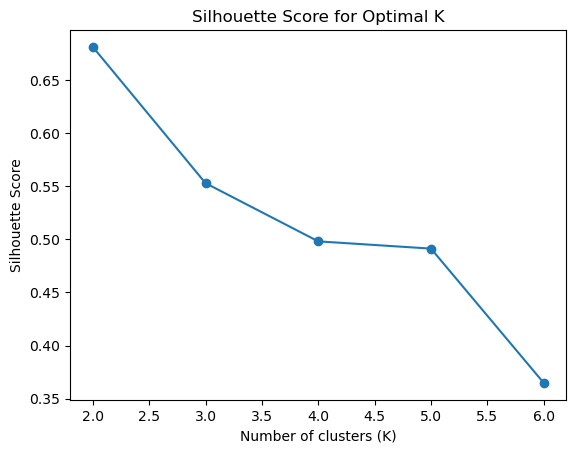

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Using the Silhouette Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = iris_df.iloc[:, [0, 1, 2, 3]].values

silhouette_scores = []

# Assuming K_range is a list of integers representing the range of clusters to try
K_range = [2, 3, 4, 5, 6]
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    silhouette_scores.append(silhouette_score(x, labels))

# Plotting silhouette scores
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


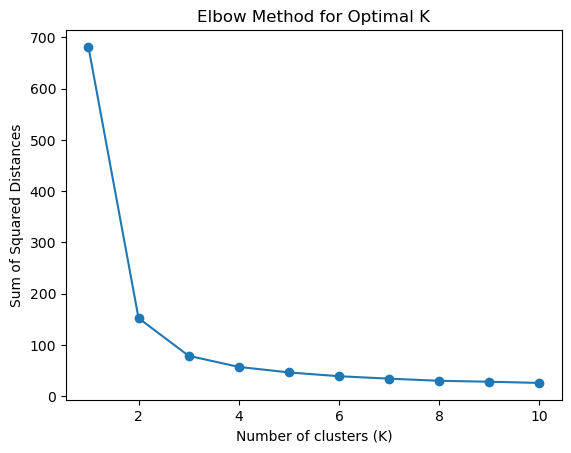

In [9]:
# Using the Elbow method

from sklearn.cluster import KMeans

# Assuming X is your data

x = iris_df.iloc[:, [0, 1, 2, 3]].values

distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
# From the graph above, we choose the number of clusters to be 3

In [10]:
# Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

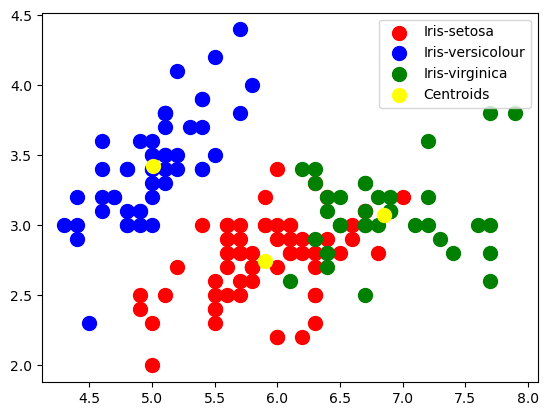

In [11]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()